### Created by Aslan Satary Dizaji (asataryd@umich.edu), Copyright (c) 2023.

# The Plots of the Project 2

Here, the codes to produce the plots of the Project 2 are brought.

## Importing the required dependencies

In [1]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import os.path as osp
import pdb
from scipy import stats
import scipy.io

## Parent folder

In [2]:
%matplotlib inline

parent_folder = osp.dirname(osp.abspath("./")) + '/tutorials/Results (Project 2)/'

## All results subfolders

In [3]:
results_subfolders = [
    "Band_Equality",
    "Band_InvIncomeWeightedCoinEndowments",
    "Band_InvIncomeWeightedUtility",
    "Band_Maximin",
    "Uniform_Equality",
    "Uniform_InvIncomeWeightedCoinEndowments",
    "Uniform_InvIncomeWeightedUtility",
    "Uniform_Maximin",
]

## Average Episode Reward across training for all runs 

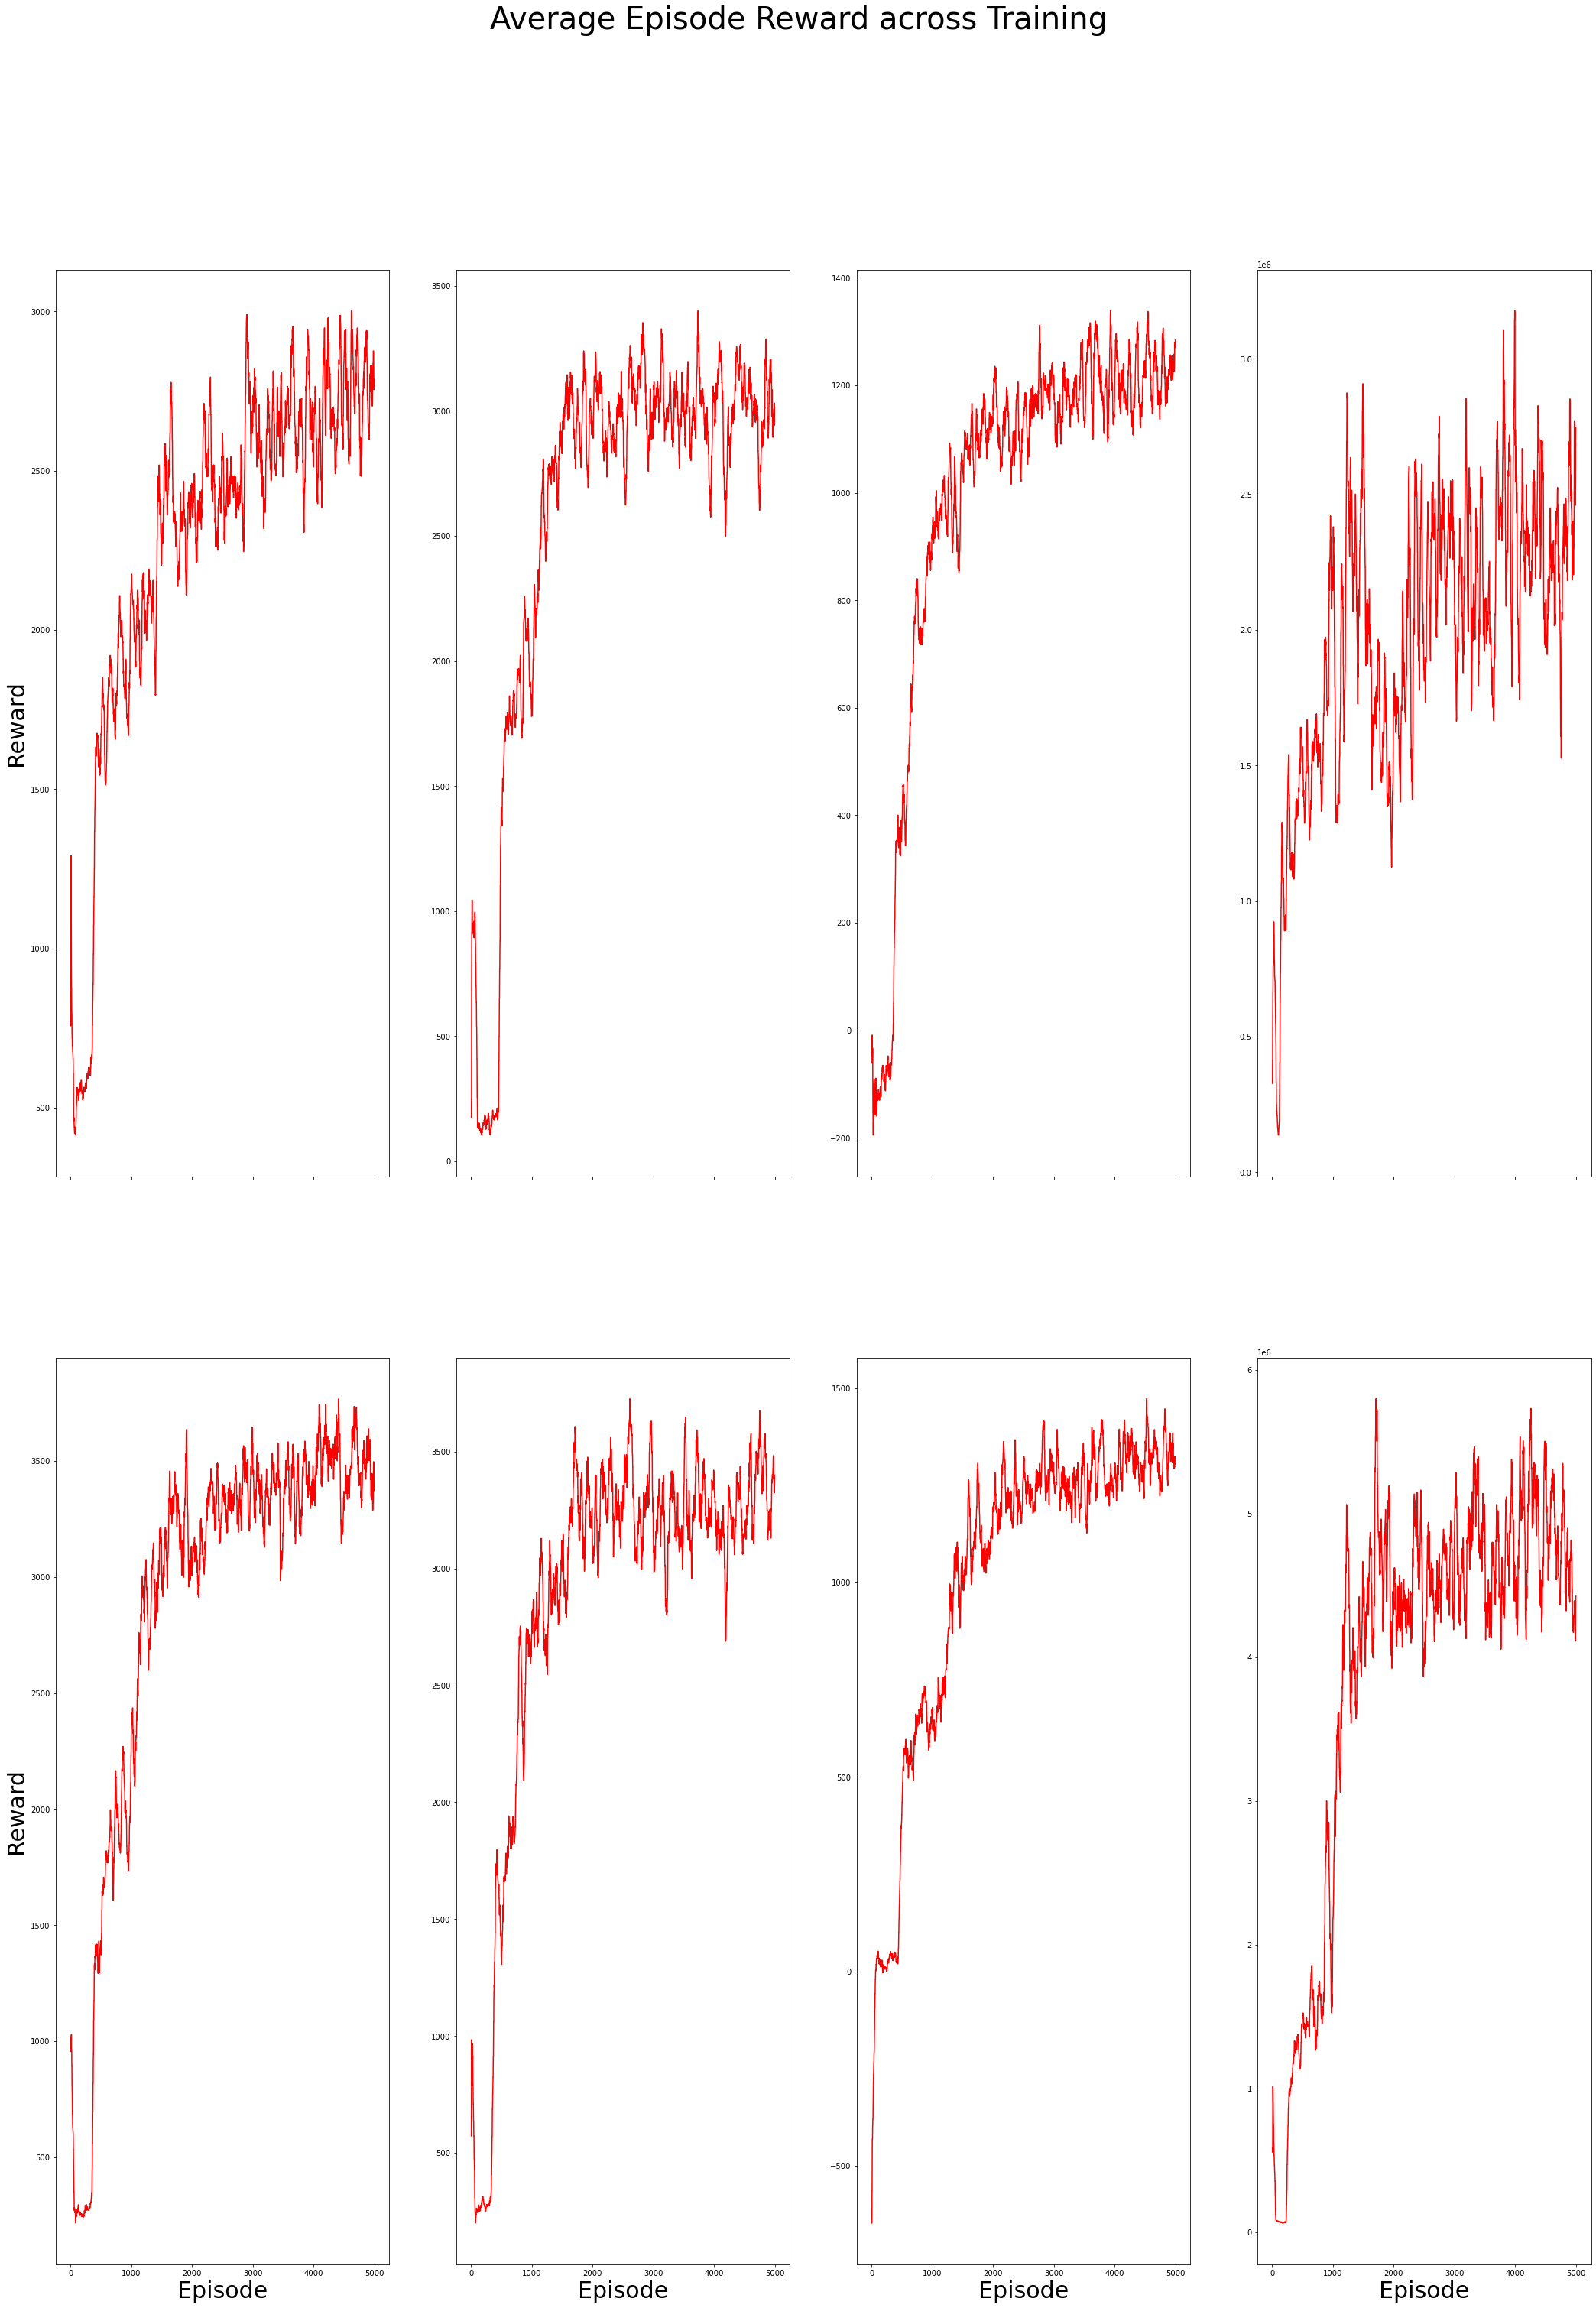

In [4]:
fig, axes = plt.subplots(2, 4, figsize = (18 * 2, 12 * 4), sharex = "col", sharey = "none")
fig.suptitle('Average Episode Reward across Training', fontsize = 40)

for i in range(2):
    for j in range(4):
        average_episode_reward = scipy.io.loadmat(parent_folder + results_subfolders[i * 4 + j] + '/episode_reward_mean.mat')['episode_reward_mean']
        
        ax = axes[i, j]
        ax.plot(range(5000), average_episode_reward.squeeze(0), '-r')
        ax.set_xticks(np.arange(0, 5001, 1000))

        if i == 1:
            ax.set_xlabel('Episode', fontsize = 30)
        if j == 0:
            ax.set_ylabel('Reward', fontsize = 30)
        
fig.savefig('Average Episode Reward across Training (Project 2).png')     

## Productivity, Equality, and Maximin across two scenarios: Band Society, Uniform Society

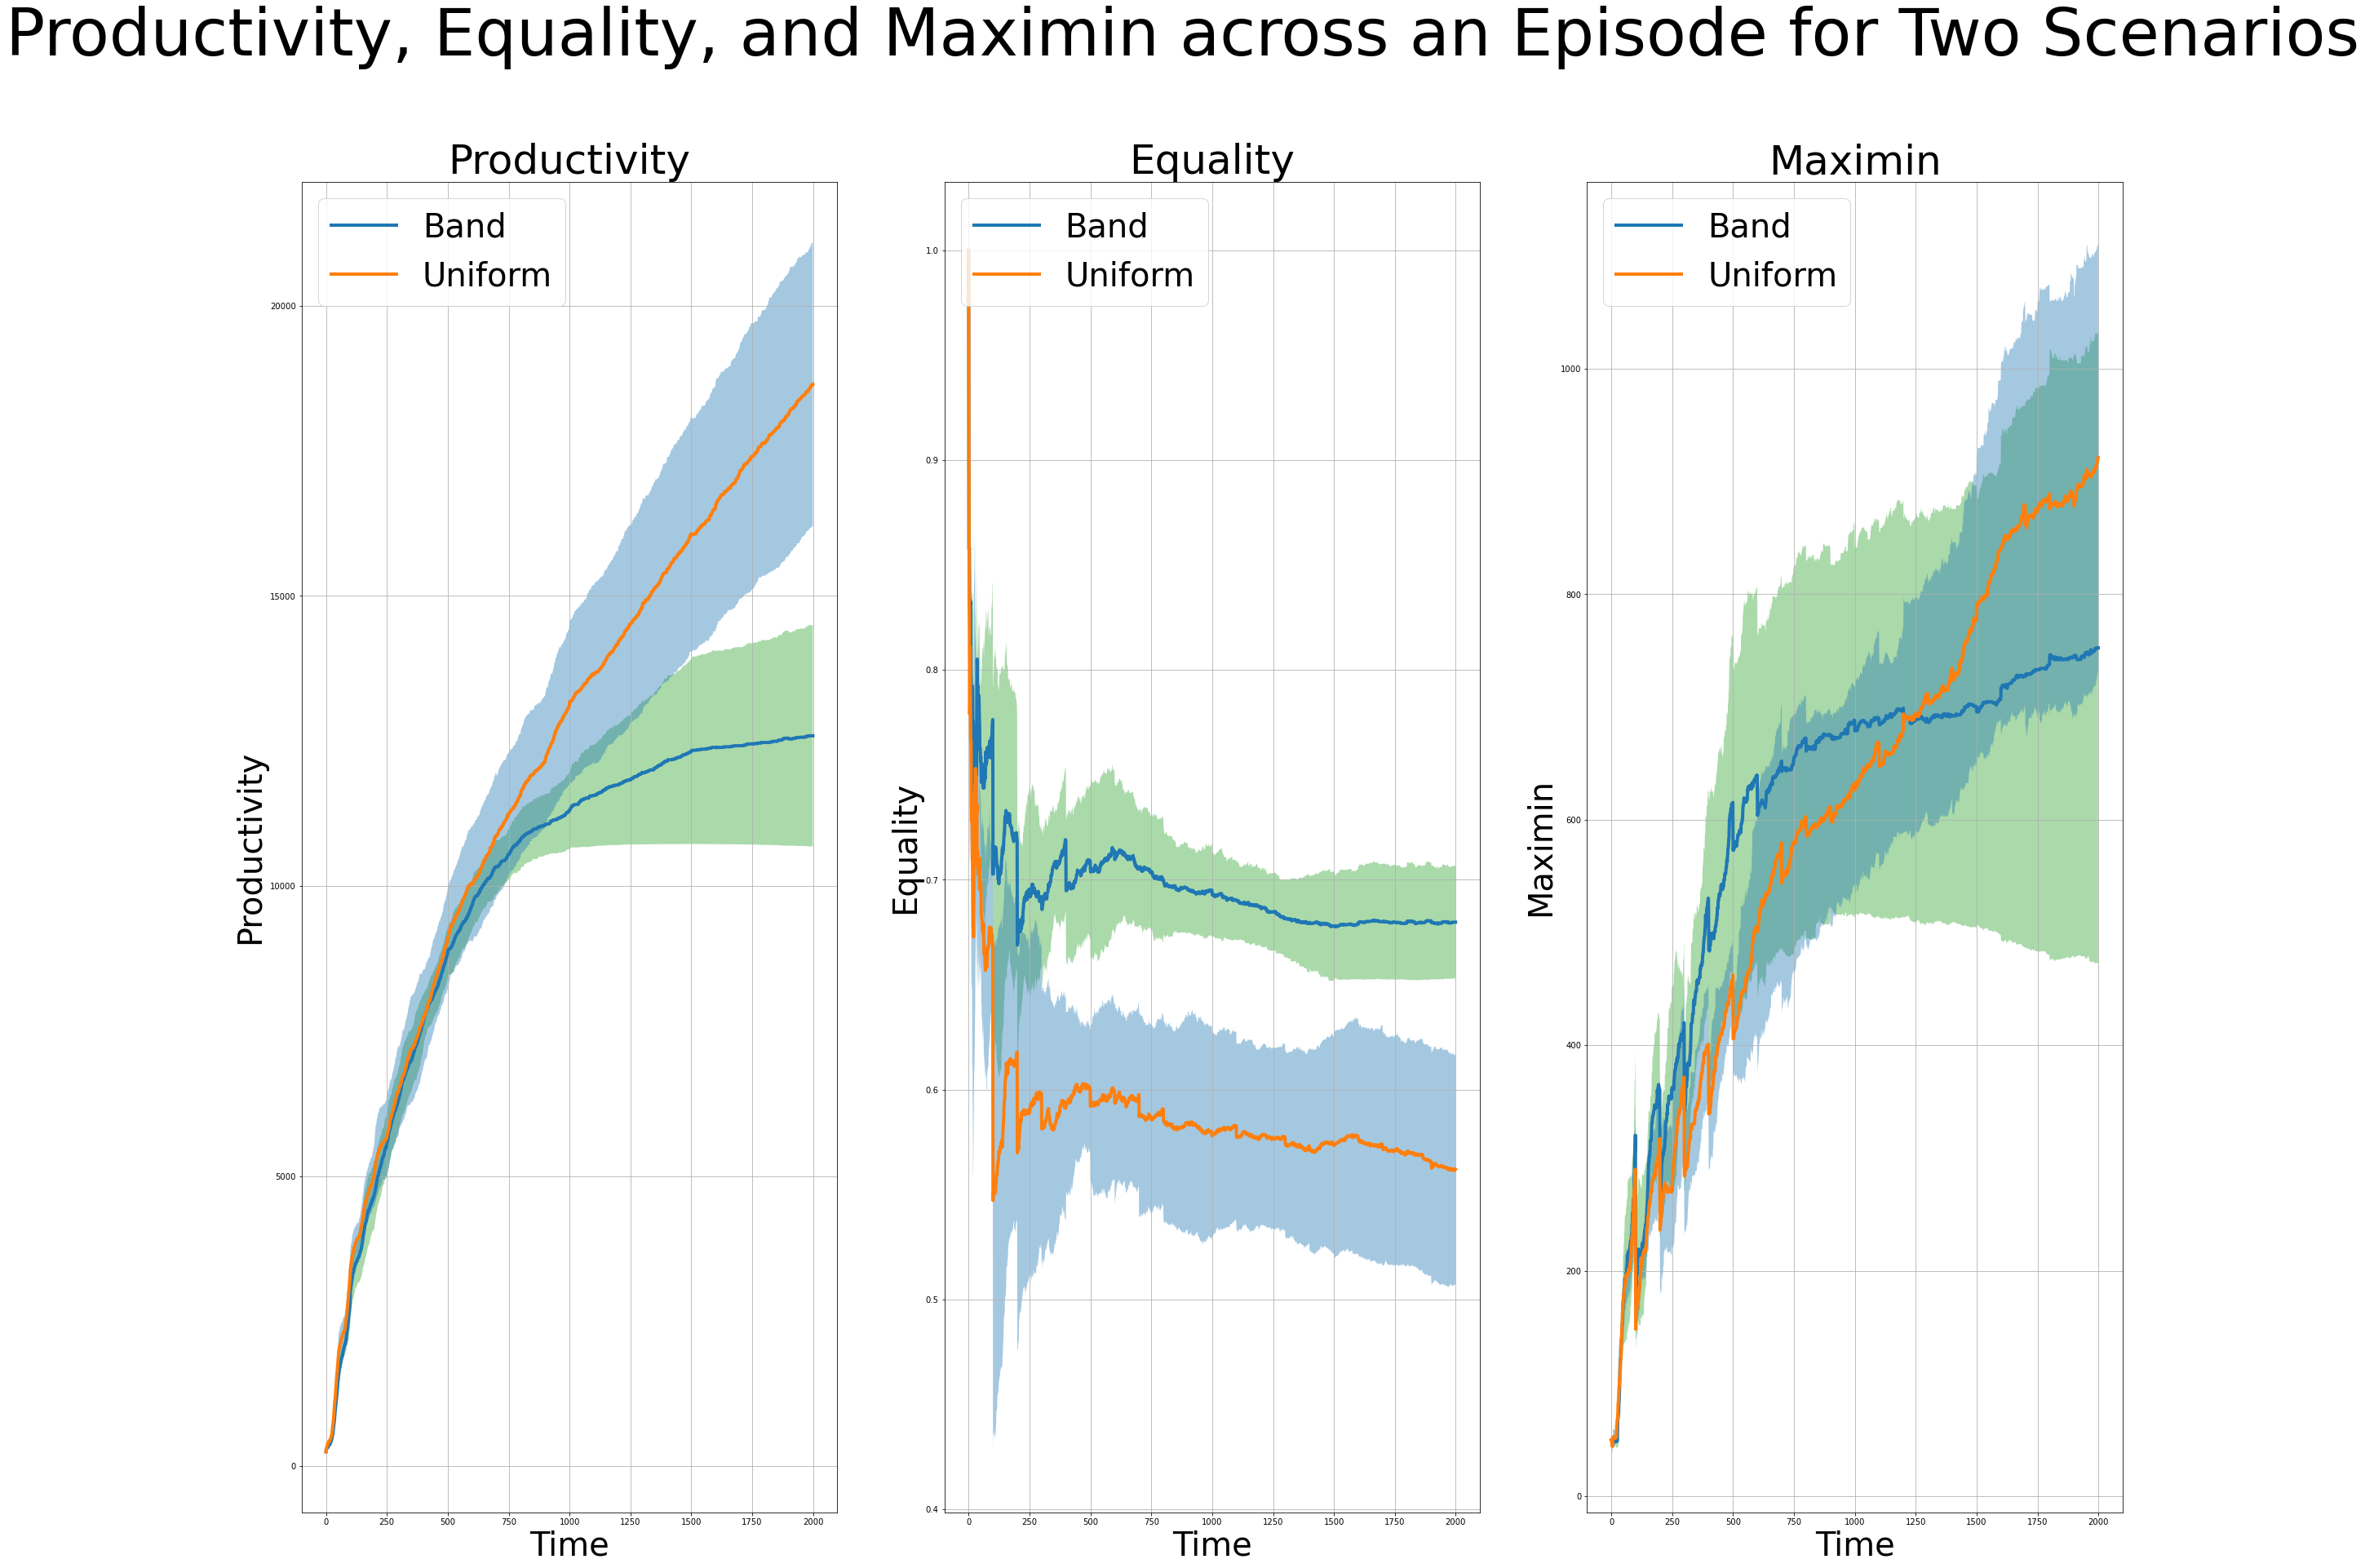

In [5]:
productivity_band = []
productivity_band.append(scipy.io.loadmat(parent_folder + results_subfolders[0] + '/productivity.mat')['productivity'])
productivity_band.append(scipy.io.loadmat(parent_folder + results_subfolders[1] + '/productivity.mat')['productivity'])
productivity_band.append(scipy.io.loadmat(parent_folder + results_subfolders[2] + '/productivity.mat')['productivity'])
productivity_band.append(scipy.io.loadmat(parent_folder + results_subfolders[3] + '/productivity.mat')['productivity'])
productivity_band = np.array(productivity_band).squeeze(1)

equality_band = []
equality_band.append(scipy.io.loadmat(parent_folder + results_subfolders[0] + '/equality.mat')['equality'])
equality_band.append(scipy.io.loadmat(parent_folder + results_subfolders[1] + '/equality.mat')['equality'])
equality_band.append(scipy.io.loadmat(parent_folder + results_subfolders[2] + '/equality.mat')['equality'])
equality_band.append(scipy.io.loadmat(parent_folder + results_subfolders[3] + '/equality.mat')['equality'])
equality_band = np.array(equality_band).squeeze(1)

maximin_band = []
maximin_band.append(scipy.io.loadmat(parent_folder + results_subfolders[0] + '/maximin.mat')['maximin'])
maximin_band.append(scipy.io.loadmat(parent_folder + results_subfolders[1] + '/maximin.mat')['maximin'])
maximin_band.append(scipy.io.loadmat(parent_folder + results_subfolders[2] + '/maximin.mat')['maximin'])
maximin_band.append(scipy.io.loadmat(parent_folder + results_subfolders[3] + '/maximin.mat')['maximin'])
maximin_band = np.array(maximin_band).squeeze(1)

productivity_uniform = []
productivity_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[4] + '/productivity.mat')['productivity'])
productivity_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[5] + '/productivity.mat')['productivity'])
productivity_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[6] + '/productivity.mat')['productivity'])
productivity_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[7] + '/productivity.mat')['productivity'])
productivity_uniform = np.array(productivity_uniform).squeeze(1)

equality_uniform = []
equality_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[4] + '/equality.mat')['equality'])
equality_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[5] + '/equality.mat')['equality'])
equality_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[6] + '/equality.mat')['equality'])
equality_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[7] + '/equality.mat')['equality'])
equality_uniform = np.array(equality_uniform).squeeze(1)

maximin_uniform = []
maximin_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[4] + '/maximin.mat')['maximin'])
maximin_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[5] + '/maximin.mat')['maximin'])
maximin_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[6] + '/maximin.mat')['maximin'])
maximin_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[7] + '/maximin.mat')['maximin'])
maximin_uniform = np.array(maximin_uniform).squeeze(1)

fig, axes = plt.subplots(1, 3, figsize = (40 * 1, 10 * 3), sharex = 'row', sharey = 'none')
fig.suptitle('Productivity, Equality, and Maximin across an Episode for Two Scenarios', fontsize = 80)

ax = axes[0]
ax.plot(np.arange(2000), productivity_band.mean(axis = 0), lw = 4, label = 'Band')
ax.plot(np.arange(2000), productivity_uniform.mean(axis = 0), lw = 4, label = 'Uniform')
ax.fill_between(np.arange(2000), productivity_band.mean(axis = 0) + productivity_band.std(axis = 0), productivity_band.mean(axis = 0) - productivity_band.std(axis = 0), facecolor = 'C2', alpha = 0.4)
ax.fill_between(np.arange(2000), productivity_uniform.mean(axis = 0) + productivity_uniform.std(axis = 0), productivity_uniform.mean(axis = 0) - productivity_uniform.std(axis = 0), facecolor = 'C0', alpha = 0.4)
ax.legend(loc = 'upper left', fontsize = 40)
ax.set_title('Productivity', fontsize = 50)
ax.set_xlabel('Time', fontsize = 40)
ax.set_ylabel('Productivity', fontsize = 40)
ax.grid()

ax = axes[1]
ax.plot(np.arange(2000), equality_band.mean(axis = 0), lw = 4, label = 'Band')
ax.plot(np.arange(2000), equality_uniform.mean(axis = 0), lw = 4, label = 'Uniform')
ax.fill_between(np.arange(2000), equality_band.mean(axis = 0) + equality_band.std(axis = 0), equality_band.mean(axis = 0) - equality_band.std(axis = 0), facecolor = 'C2', alpha = 0.4)
ax.fill_between(np.arange(2000), equality_uniform.mean(axis = 0) + equality_uniform.std(axis = 0), equality_uniform.mean(axis = 0) - equality_uniform.std(axis = 0), facecolor = 'C0', alpha = 0.4)
ax.legend(loc = 'upper left', fontsize = 40)
ax.set_title('Equality', fontsize = 50)
ax.set_xlabel('Time', fontsize = 40)
ax.set_ylabel('Equality', fontsize = 40)
ax.grid()

ax = axes[2]
ax.plot(np.arange(2000), maximin_band.mean(axis = 0), lw = 4, label = 'Band')
ax.plot(np.arange(2000), maximin_uniform.mean(axis = 0), lw = 4, label = 'Uniform')
ax.fill_between(np.arange(2000), maximin_band.mean(axis = 0) + maximin_band.std(axis = 0), maximin_band.mean(axis = 0) - maximin_band.std(axis = 0), facecolor = 'C2', alpha = 0.4)
ax.fill_between(np.arange(2000), maximin_uniform.mean(axis = 0) + maximin_uniform.std(axis = 0), maximin_uniform.mean(axis = 0) - maximin_uniform.std(axis = 0), facecolor = 'C0', alpha = 0.4)
ax.legend(loc = 'upper left', fontsize = 40)
ax.set_title('Maximin', fontsize = 50)
ax.set_xlabel('Time', fontsize = 40)
ax.set_ylabel('Maximin', fontsize = 40)
ax.grid()

fig.savefig('Productivity, Equality, and Maximin across an Episode for Two Scenarios (Project 2).png')  

## Amount of three material resources - Wood, Stone, and Iron - in the environment across two scenarios: Band Society, Uniform Society

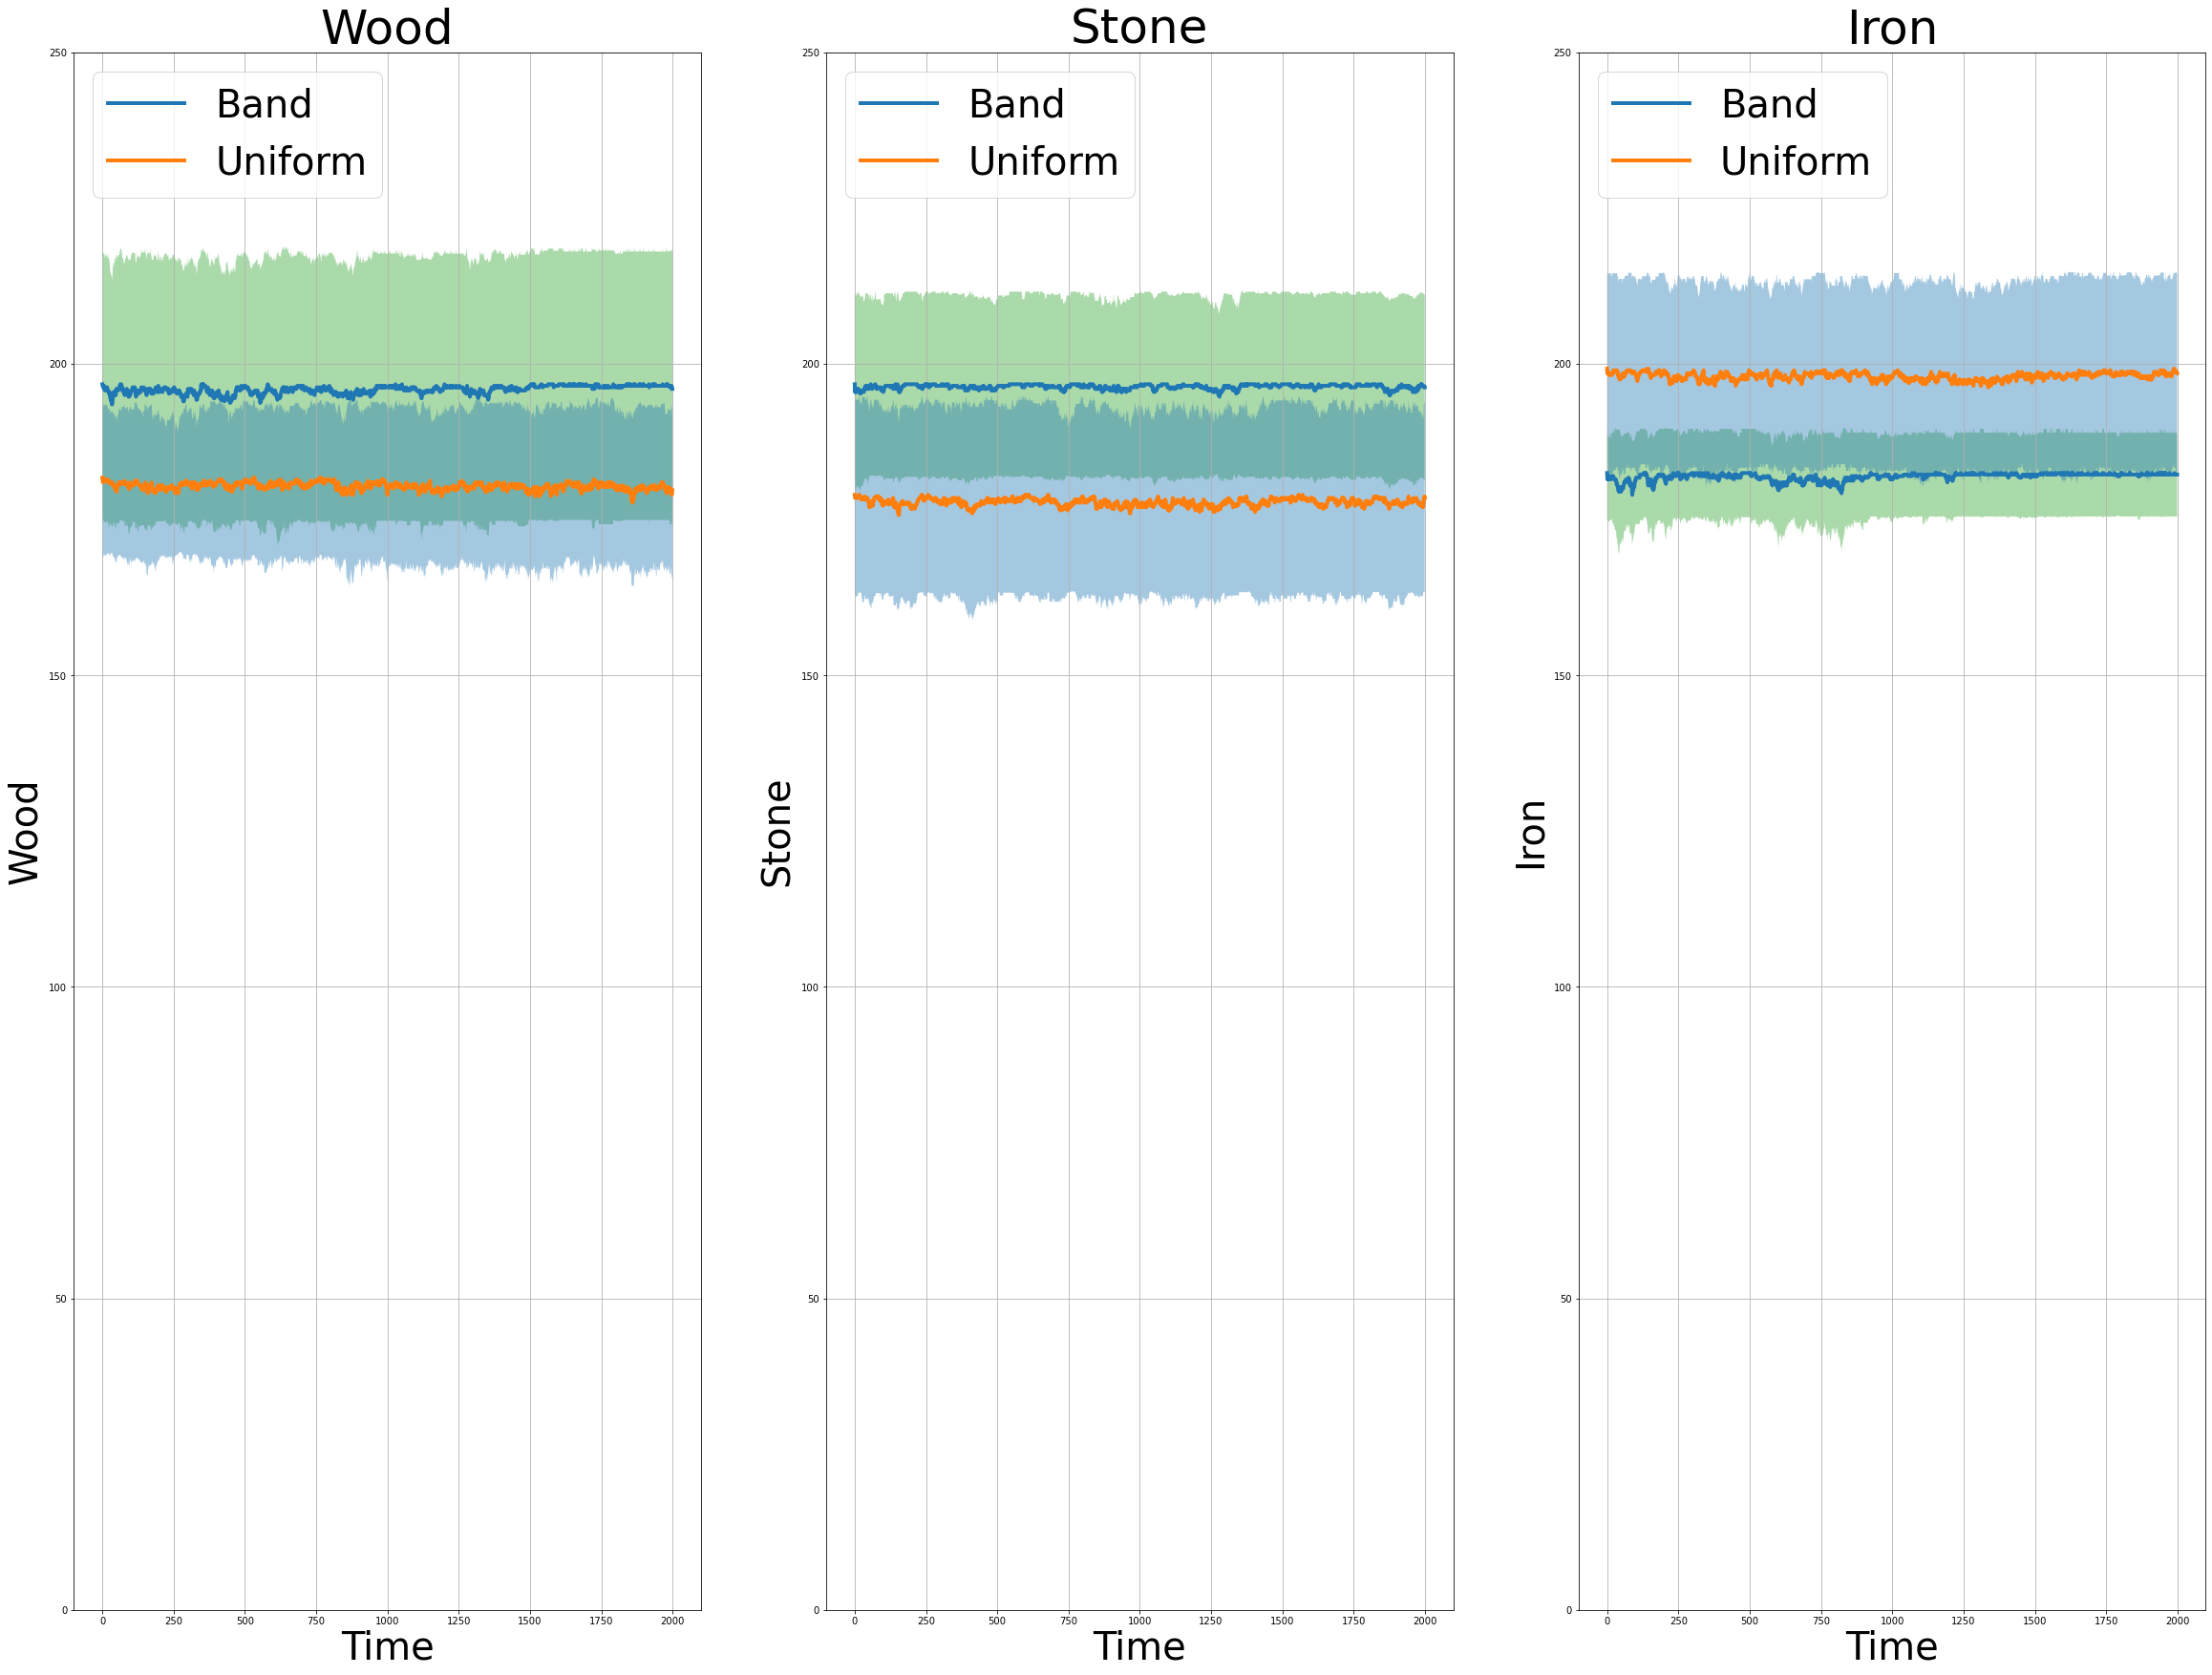

In [6]:
wood_band = []
wood_band.append(scipy.io.loadmat(parent_folder + results_subfolders[0] + '/wood_amount_world.mat')['wood_amount_world'])
wood_band.append(scipy.io.loadmat(parent_folder + results_subfolders[1] + '/wood_amount_world.mat')['wood_amount_world'])
wood_band.append(scipy.io.loadmat(parent_folder + results_subfolders[2] + '/wood_amount_world.mat')['wood_amount_world'])
wood_band.append(scipy.io.loadmat(parent_folder + results_subfolders[3] + '/wood_amount_world.mat')['wood_amount_world'])
wood_band = np.array(wood_band).squeeze(1)

stone_band = []
stone_band.append(scipy.io.loadmat(parent_folder + results_subfolders[0] + '/stone_amount_world.mat')['stone_amount_world'])
stone_band.append(scipy.io.loadmat(parent_folder + results_subfolders[1] + '/stone_amount_world.mat')['stone_amount_world'])
stone_band.append(scipy.io.loadmat(parent_folder + results_subfolders[2] + '/stone_amount_world.mat')['stone_amount_world'])
stone_band.append(scipy.io.loadmat(parent_folder + results_subfolders[3] + '/stone_amount_world.mat')['stone_amount_world'])
stone_band = np.array(stone_band).squeeze(1)

iron_band = []
iron_band.append(scipy.io.loadmat(parent_folder + results_subfolders[0] + '/iron_amount_world.mat')['iron_amount_world'])
iron_band.append(scipy.io.loadmat(parent_folder + results_subfolders[1] + '/iron_amount_world.mat')['iron_amount_world'])
iron_band.append(scipy.io.loadmat(parent_folder + results_subfolders[2] + '/iron_amount_world.mat')['iron_amount_world'])
iron_band.append(scipy.io.loadmat(parent_folder + results_subfolders[3] + '/iron_amount_world.mat')['iron_amount_world'])
iron_band = np.array(iron_band).squeeze(1)

wood_uniform = []
wood_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[4] + '/wood_amount_world.mat')['wood_amount_world'])
wood_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[5] + '/wood_amount_world.mat')['wood_amount_world'])
wood_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[6] + '/wood_amount_world.mat')['wood_amount_world'])
wood_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[7] + '/wood_amount_world.mat')['wood_amount_world'])
wood_uniform = np.array(wood_uniform).squeeze(1)

stone_uniform = []
stone_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[4] + '/stone_amount_world.mat')['stone_amount_world'])
stone_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[5] + '/stone_amount_world.mat')['stone_amount_world'])
stone_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[6] + '/stone_amount_world.mat')['stone_amount_world'])
stone_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[7] + '/stone_amount_world.mat')['stone_amount_world'])
stone_uniform = np.array(stone_uniform).squeeze(1)

iron_uniform = []
iron_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[4] + '/iron_amount_world.mat')['iron_amount_world'])
iron_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[5] + '/iron_amount_world.mat')['iron_amount_world'])
iron_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[6] + '/iron_amount_world.mat')['iron_amount_world'])
iron_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[7] + '/iron_amount_world.mat')['iron_amount_world'])
iron_uniform = np.array(iron_uniform).squeeze(1)

fig, axes = plt.subplots(1, 3, figsize = (40 * 1, 10 * 3), sharex = 'row', sharey = 'none')
# fig.suptitle('Amount of Three Material Resources across an Episode for Two Scenarios', fontsize = 40)

ax = axes[0]
ax.plot(np.arange(2000), wood_band.mean(axis = 0), lw = 4, label = 'Band')
ax.plot(np.arange(2000), wood_uniform.mean(axis = 0), lw = 4, label = 'Uniform')
ax.fill_between(np.arange(2000), wood_band.mean(axis = 0) + wood_band.std(axis = 0), wood_band.mean(axis = 0) - wood_band.std(axis = 0), facecolor = 'C2', alpha = 0.4)
ax.fill_between(np.arange(2000), wood_uniform.mean(axis = 0) + wood_uniform.std(axis = 0), wood_uniform.mean(axis = 0) - wood_uniform.std(axis = 0), facecolor = 'C0', alpha = 0.4)
ax.legend(loc = 'upper left', fontsize = 40)
ax.set_title('Wood', fontsize = 50)
ax.set_xlabel('Time', fontsize = 40)
ax.set_ylabel('Wood', fontsize = 40)
ax.set_ylim((0, 250))
ax.grid()

ax = axes[1]
ax.plot(np.arange(2000), stone_band.mean(axis = 0), lw = 4, label = 'Band')
ax.plot(np.arange(2000), stone_uniform.mean(axis = 0), lw = 4, label = 'Uniform')
ax.fill_between(np.arange(2000), stone_band.mean(axis = 0) + stone_band.std(axis = 0), stone_band.mean(axis = 0) - stone_band.std(axis = 0), facecolor = 'C2', alpha = 0.4)
ax.fill_between(np.arange(2000), stone_uniform.mean(axis = 0) + stone_uniform.std(axis = 0), stone_uniform.mean(axis = 0) - stone_uniform.std(axis = 0), facecolor = 'C0', alpha = 0.4)
ax.legend(loc = 'upper left', fontsize = 40)
ax.set_title('Stone', fontsize = 50)
ax.set_xlabel('Time', fontsize = 40)
ax.set_ylabel('Stone', fontsize = 40)
ax.set_ylim((0, 250))
ax.grid()

ax = axes[2]
ax.plot(np.arange(2000), iron_band.mean(axis = 0), lw = 4, label = 'Band')
ax.plot(np.arange(2000), iron_uniform.mean(axis = 0), lw = 4, label = 'Uniform')
ax.fill_between(np.arange(2000), iron_band.mean(axis = 0) + iron_band.std(axis = 0), iron_band.mean(axis = 0) - iron_band.std(axis = 0), facecolor = 'C2', alpha = 0.4)
ax.fill_between(np.arange(2000), iron_uniform.mean(axis = 0) + iron_uniform.std(axis = 0), iron_uniform.mean(axis = 0) - iron_uniform.std(axis = 0), facecolor = 'C0', alpha = 0.4)
ax.legend(loc = 'upper left', fontsize = 40)
ax.set_title('Iron', fontsize = 50)
ax.set_xlabel('Time', fontsize = 40)
ax.set_ylabel('Iron', fontsize = 40)
ax.set_ylim((0, 250))
ax.grid()

fig.savefig('Amount of Three Material Resources across an Episode for Two Scenarios (Project 2).png')

## Tax Return across two scenarios: Band Society, Uniform Society

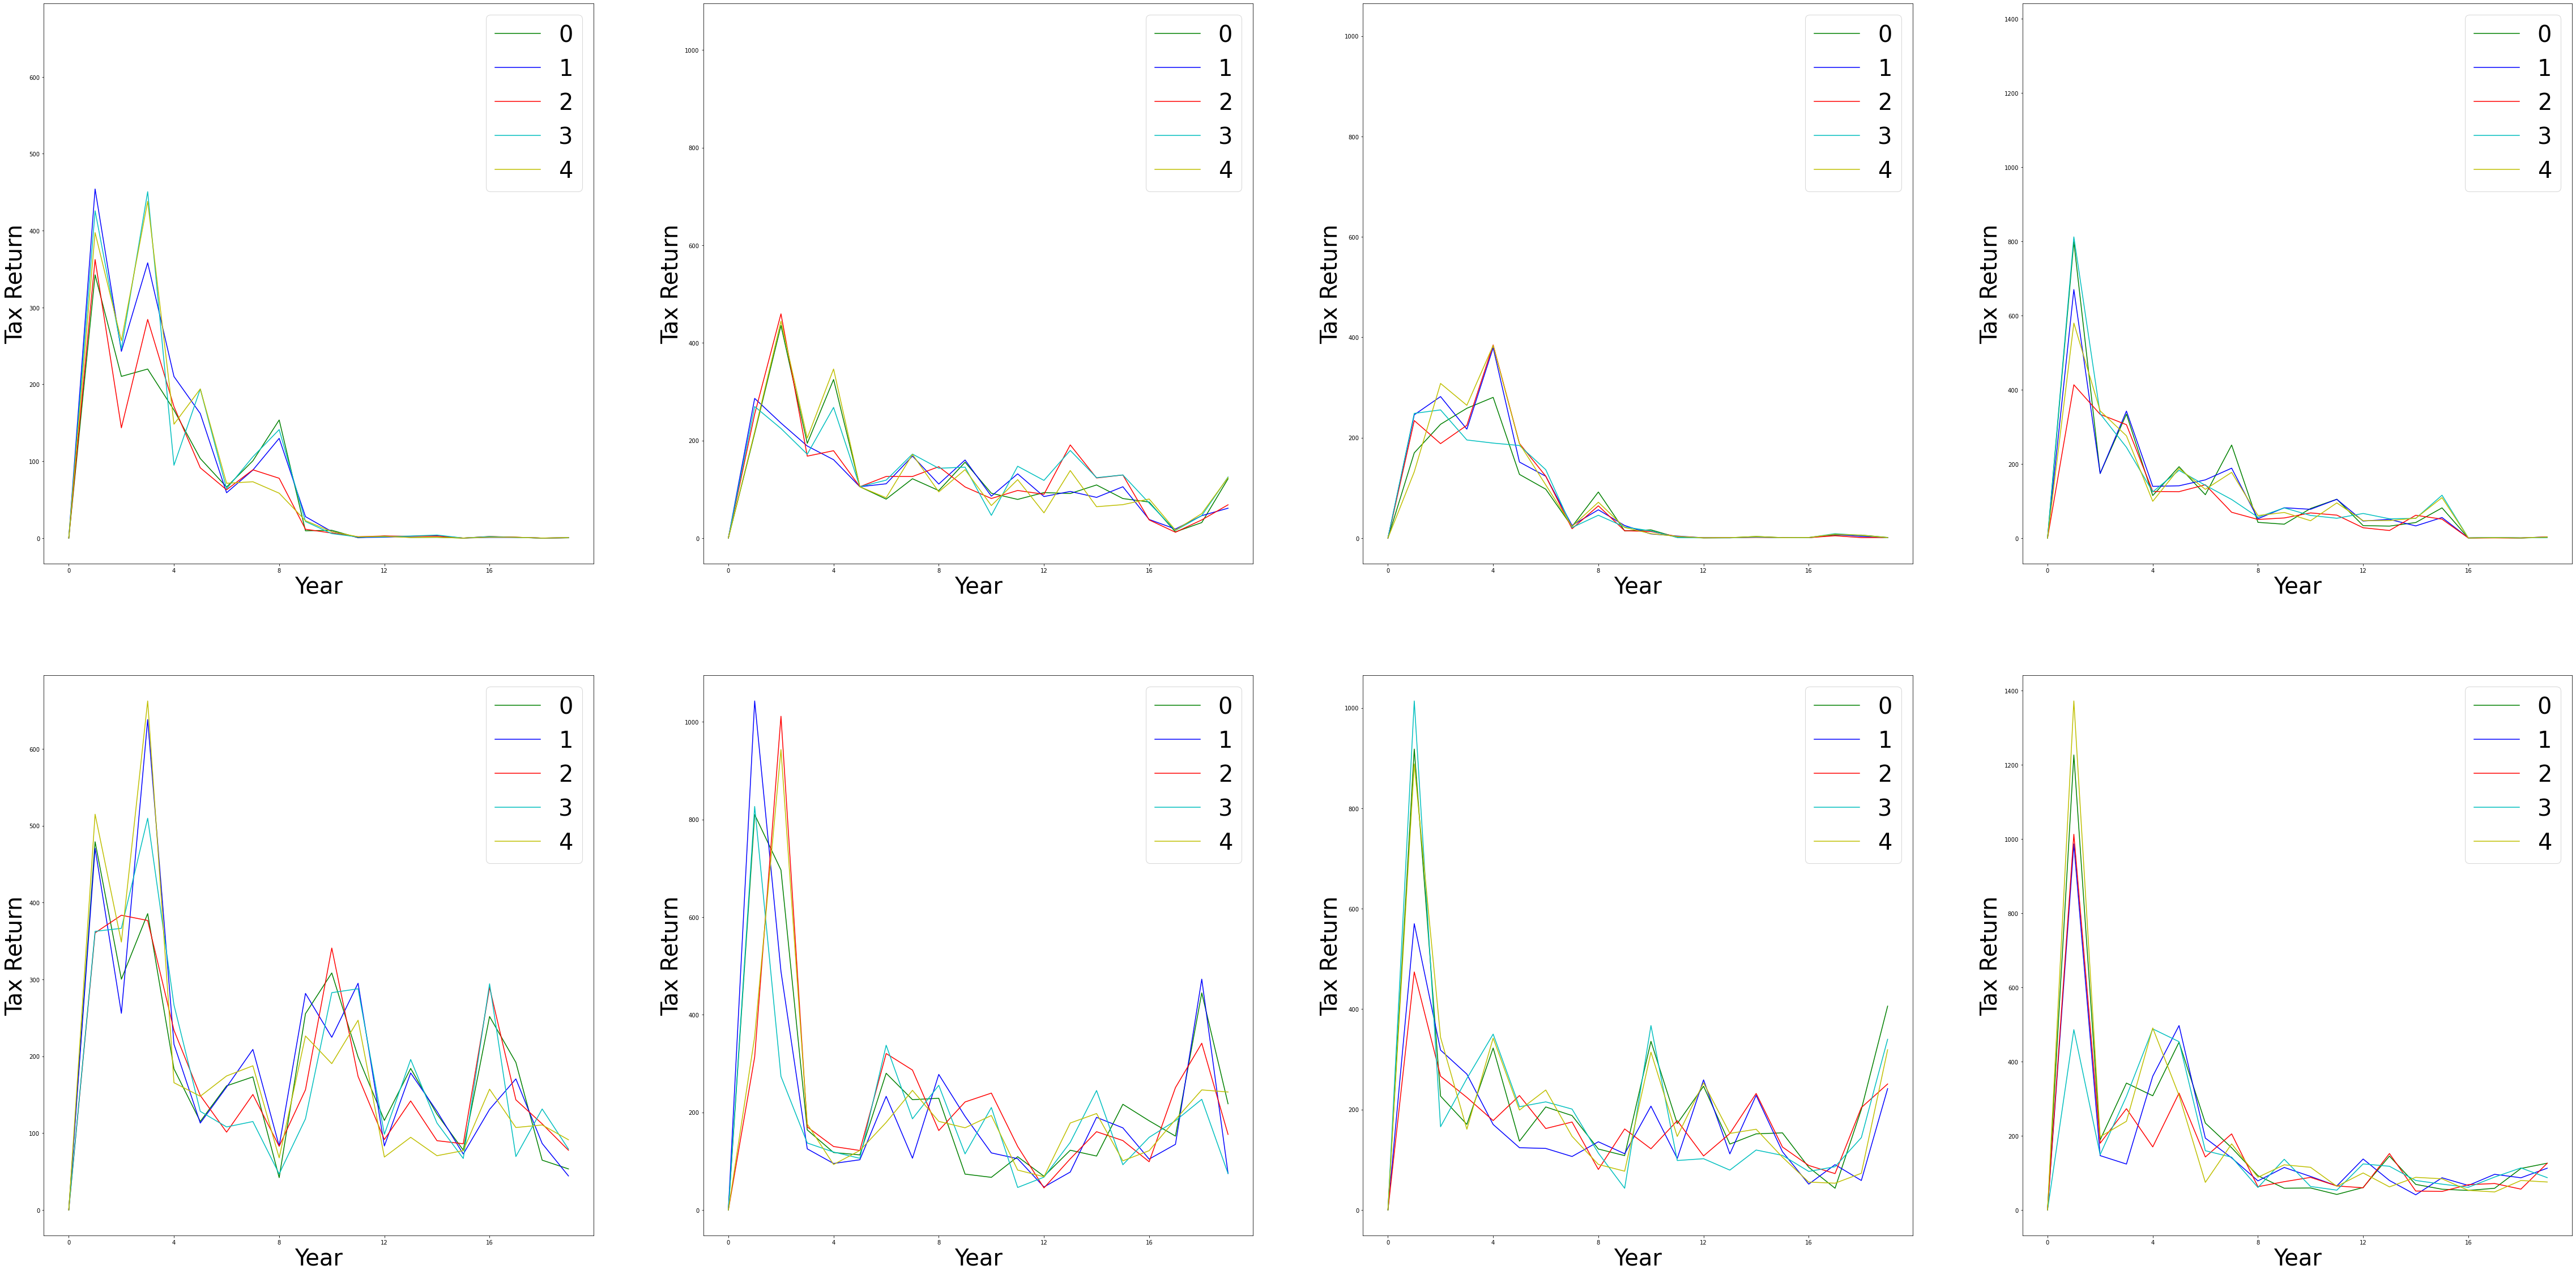

In [7]:
lump_sum_actual_band = []
lump_sum_actual_band.append(scipy.io.loadmat(parent_folder + results_subfolders[0] + '/lump_sum_actual.mat')['lump_sum_actual'])
lump_sum_actual_band.append(scipy.io.loadmat(parent_folder + results_subfolders[1] + '/lump_sum_actual.mat')['lump_sum_actual'])
lump_sum_actual_band.append(scipy.io.loadmat(parent_folder + results_subfolders[2] + '/lump_sum_actual.mat')['lump_sum_actual'])
lump_sum_actual_band.append(scipy.io.loadmat(parent_folder + results_subfolders[3] + '/lump_sum_actual.mat')['lump_sum_actual'])
lump_sum_actual_band = np.array(lump_sum_actual_band)

lump_sum_actual_uniform = []
lump_sum_actual_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[4] + '/lump_sum_actual.mat')['lump_sum_actual'])
lump_sum_actual_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[5] + '/lump_sum_actual.mat')['lump_sum_actual'])
lump_sum_actual_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[6] + '/lump_sum_actual.mat')['lump_sum_actual'])
lump_sum_actual_uniform.append(scipy.io.loadmat(parent_folder + results_subfolders[7] + '/lump_sum_actual.mat')['lump_sum_actual'])
lump_sum_actual_uniform = np.array(lump_sum_actual_uniform)

lump_sum_actual_band_modified = np.zeros((4, 20, 5))
lump_sum_actual_uniform_modified = np.zeros((4, 20, 5))

for i in range(4):
    for j in range(20):
        for k in range(5):
            lump_sum_actual_band_modified[i, j, k] = lump_sum_actual_band[i, 100 * j: 100 * (j + 1), k].mean(axis = 0)
            lump_sum_actual_uniform_modified[i, j, k] = lump_sum_actual_uniform[i, 100 * j: 100 * (j + 1), k].mean(axis = 0)

fig, axes = plt.subplots(2, 4, figsize = (40 * 2, 10 * 4), sharex = 'row', sharey = 'col')
# fig.suptitle('Tax Return across Consequtive Years of an Episode for all Agents of Two Scenarios', fontsize = 80)

for i in range(4):
    ax = axes[0, i]
    ax.plot(range(0, 20), lump_sum_actual_band_modified[i].T[0], "-g", label='0')
    ax.plot(range(0, 20), lump_sum_actual_band_modified[i].T[1], "-b", label='1')
    ax.plot(range(0, 20), lump_sum_actual_band_modified[i].T[2], "-r", label='2')
    ax.plot(range(0, 20), lump_sum_actual_band_modified[i].T[3], "-c", label='3')
    ax.plot(range(0, 20), lump_sum_actual_band_modified[i].T[4], "-y", label='4')
    ax.set_xticks(range(0, 20, 4))
    ax.set_xlabel('Year', fontsize = 40)
    ax.set_ylabel('Tax Return', fontsize = 40)
    ax.legend(fontsize = 40)
    
    ax = axes[1, i]
    ax.plot(range(0, 20), lump_sum_actual_uniform_modified[i].T[0], "-g", label='0')
    ax.plot(range(0, 20), lump_sum_actual_uniform_modified[i].T[1], "-b", label='1')
    ax.plot(range(0, 20), lump_sum_actual_uniform_modified[i].T[2], "-r", label='2')
    ax.plot(range(0, 20), lump_sum_actual_uniform_modified[i].T[3], "-c", label='3')
    ax.plot(range(0, 20), lump_sum_actual_uniform_modified[i].T[4], "-y", label='4')
    ax.set_xticks(range(0, 20, 4))
    ax.set_xlabel('Year', fontsize = 40)
    ax.set_ylabel('Tax Return', fontsize = 40)
    ax.legend(fontsize = 40)

fig.savefig('Tax Return across Consequtive Years of an Episode for all Agents of Two Scenarios (Project 2).png')